In [2]:
import psycopg2
import numpy as np
import pandas as pd
from scipy import stats
import datetime as dt
from datetime import date
import statsmodels.api as sm
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
DB_NAME = ''
DB_USER = ''
DB_PWD = ''
DB_HOST = ''
DB_PORT = ''

try:
    connection = psycopg2.connect(user = DB_USER,
                                  password = DB_PWD,
                                  host = DB_PWD ,
                                  port = DB_PORT,
                                  database = DB_NAME)
    cursor = connection.cursor()
    print ( connection.get_dsn_parameters(),"\n")
    record_traffic = pd.read_sql("SELECT * FROM trafficdata;",connection)
    record_eod = pd.read_sql("SELECT * FROM eodhistoricaldata;",connection)
    record_sales = pd.read_sql("SELECT * FROM salesestimate;",connection)
    
except (Exception, psycopg2.Error) as error :
    print ("Error while connecting to PostgreSQL", error)
    
finally:
    #closing database connection.
        if(connection):
            cursor.close()
            connection.close()
            print("PostgreSQL connection is closed")

{'user': 'altcap_usr', 'dbname': 'altcap_db', 'host': '167.99.88.131', 'port': '5432', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'} 

PostgreSQL connection is closed


In [4]:
record_traffic.date = record_traffic.date.map(lambda x: x.strftime('%Y-%m-%d'))
record_eod.date = record_eod.date.map(lambda x: x.strftime('%Y-%m-%d'))
record_sales.date = record_sales.date.map(lambda x: x.strftime('%Y-%m-%d'))
record_eod.head()
# record_traffic.head()

,id,date,open,high,low,close,adjusted_close,volume,company_id
0,8383,2001-10-04,24.0,24.0,24.0,24.0,24.0,11000.0,1
1,8384,2001-10-05,25.0,25.0,23.0,24.0,24.0,37930.0,1
2,8385,2001-10-08,25.0,25.0,24.0,24.0,24.0,10000.0,1
3,8386,2001-10-12,24.0,24.0,24.0,24.0,24.0,10000.0,1
4,8387,2001-10-17,24.0,25.0,23.0,24.0,24.0,52174.0,1


In [6]:
df_sales_traffic = pd.merge(record_traffic, record_sales, on=['date','company_id'],how="inner")

# df_sales_traffic.apply(pd.value_counts).fillna(method='bfill')
df_sales_traffic

,id_x,date,traffic,paid_traffic,company_id,period,source_id_x,id_y,analysis_estimates,analysis_high,analysis_low,analysis_mean,analysis_year_ago,trend_2month_ago,trend_current,trend_month_ago,trend_week_ago,trend_year_ago,source_id_y
0,613,2019-03-15,11575,0,1,daily,2,15,23,2.842580e+09,2.749000e+09,2.789720e+09,3.051750e+09,2.813970e+09,2.789720e+09,2.802240e+09,2.787650e+09,3.051750e+09,3
1,615,2019-03-17,7820,0,1,daily,2,17,23,2.842580e+09,2.749000e+09,2.789720e+09,3.051750e+09,2.813970e+09,2.789720e+09,2.802240e+09,2.787650e+09,3.051750e+09,3
2,498,2019-03-14,11575,0,1,daily,2,14,23,2.823000e+09,2.749000e+09,2.787440e+09,3.051750e+09,2.813970e+09,2.787440e+09,2.803580e+09,2.787650e+09,3.051750e+09,3
3,500,2019-03-04,9087,0,1,daily,2,4,23,2.823000e+09,2.749000e+09,2.787650e+09,3.051240e+09,2.824190e+09,2.787650e+09,2.803710e+09,2.793790e+09,3.051240e+09,3
4,501,2019-03-03,4674,0,1,daily,2,3,23,2.823000e+09,2.749000e+09,2.787650e+09,3.051240e+09,2.824190e+09,2.787650e+09,2.804110e+09,2.793790e+09,3.051240e+09,3
5,502,2019-03-02,5785,0,1,daily,2,2,23,2.823000e+09,2.749000e+09,2.787650e+09,3.051240e+09,2.824190e+09,2.787650e+09,2.803710e+09,2.793790e+09,3.051240e+09,3
6,503,2019-03-01,10687,0,1,daily,2,1,23,2.823000e+09,2.749000e+09,2.787650e+09,3.051240e+09,2.824190e+09,2.787650e+09,2.803710e+09,2.793790e+09,3.051240e+09,3
7,510,2019-03-12,5559,0,1,daily,2,12,23,2.823000e+09,2.749000e+09,2.787650e+09,3.051240e+09,2.822500e+09,2.787650e+09,2.803580e+09,2.787650e+09,3.051240e+09,3
8,521,2019-03-11,5821,0,1,daily,2,11,23,2.823000e+09,2.749000e+09,2.787650e+09,3.051240e+09,2.822500e+09,2.787650e+09,2.803580e+09,2.787650e+09,3.051240e+09,3
9,522,2019-03-10,5702,0,1,daily,2,10,23,2.823000e+09,2.749000e+09,2.787650e+09,3.051240e+09,2.822500e+09,2.787650e+09,2.803580e+09,2.787650e+09,3.051240e+09,3


In [63]:
df_sales_traffic[['traffic','analysis_mean']] = (df_sales_traffic[['traffic','analysis_mean']] - df_sales_traffic[['traffic','analysis_mean']].min())/(df_sales_traffic[['traffic','analysis_mean']].max()-df_sales_traffic[['traffic','analysis_mean']].min())
df_sales_traffic.head()

,id_x,date,traffic,paid_traffic,company_id,period,source_id_x,id_y,analysis_estimates,analysis_high,analysis_low,analysis_mean,analysis_year_ago,trend_2month_ago,trend_current,trend_month_ago,trend_week_ago,trend_year_ago,source_id_y
0,613,2019-03-15,0.000035,0,1,daily,2,15,23,2.842580e+09,2.749000e+09,0.086416,3.051750e+09,2.813970e+09,2.789720e+09,2.802240e+09,2.787650e+09,3.051750e+09,3
1,615,2019-03-17,0.000016,0,1,daily,2,17,23,2.842580e+09,2.749000e+09,0.086416,3.051750e+09,2.813970e+09,2.789720e+09,2.802240e+09,2.787650e+09,3.051750e+09,3
2,498,2019-03-14,0.000035,0,1,daily,2,14,23,2.823000e+09,2.749000e+09,0.086343,3.051750e+09,2.813970e+09,2.787440e+09,2.803580e+09,2.787650e+09,3.051750e+09,3
3,500,2019-03-04,0.000022,0,1,daily,2,4,23,2.823000e+09,2.749000e+09,0.086350,3.051240e+09,2.824190e+09,2.787650e+09,2.803710e+09,2.793790e+09,3.051240e+09,3
4,501,2019-03-03,0.000000,0,1,daily,2,3,23,2.823000e+09,2.749000e+09,0.086350,3.051240e+09,2.824190e+09,2.787650e+09,2.804110e+09,2.793790e+09,3.051240e+09,3


Text(0, 0.5, 'Daily Sales')

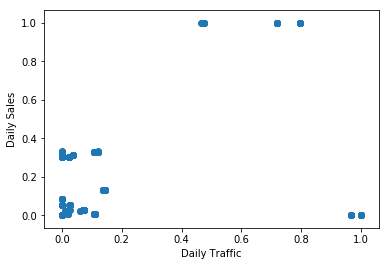

In [64]:
plt.scatter(df_sales_traffic.traffic,df_sales_traffic.analysis_mean)
plt.xlabel("Daily Traffic")
plt.ylabel("Daily Sales")

In [10]:
df_sales_traffic = pd.merge(record_traffic, record_eod, on=['date','company_id'],how="inner")

# df_sales_traffic.apply(pd.value_counts).fillna(method='bfill')
df_sales_traffic[df_sales_traffic.period=='monthly']

,id_x,date,traffic,paid_traffic,company_id,period,source_id,id_y,open,high,low,close,adjusted_close,volume
1,1549,2019-01-15,5780,0,1,monthly,2,12464,2992.0,2992.0,2669.0,2860.0,2860.0,1032066.0
2,1551,2018-03-15,8689,0,1,monthly,2,12254,7504.0,7770.0,7504.0,7730.0,7730.0,270632.0
3,1552,2018-02-15,5753,0,1,monthly,2,12234,7164.0,7288.0,7162.0,7286.0,7286.0,366737.0
4,1553,2018-01-15,11041,0,1,monthly,2,12211,6888.0,6916.0,6695.0,6838.0,6838.0,196500.0
5,1554,2017-12-15,7427,0,1,monthly,2,12193,6206.0,6223.0,5935.0,6200.0,6200.0,263194.0
6,1555,2017-11-15,1982,0,1,monthly,2,12171,5656.0,5726.0,5642.0,5705.0,5705.0,327264.0
7,1557,2017-09-15,3532,0,1,monthly,2,12128,5574.0,5700.0,5518.0,5549.0,5549.0,582871.0
8,1558,2017-08-15,1088,0,1,monthly,2,12106,5890.0,5986.0,5853.0,5917.0,5917.0,87725.0
9,1561,2017-06-15,1548,0,1,monthly,2,12063,6101.0,6132.0,5988.0,6046.0,6046.0,368754.0
10,1562,2017-05-15,1473,0,1,monthly,2,12041,6155.0,6184.0,6099.0,6154.0,6154.0,340168.0


Text(0, 0.5, 'Monthly Sales')

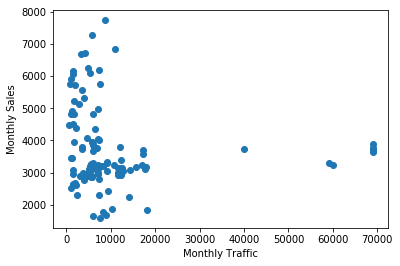

In [13]:
plt.scatter(df_sales_traffic.traffic,df_sales_traffic.adjusted_close)
plt.xlabel("Monthly Traffic")
plt.ylabel("Monthly Sales")
# plt.xlim(0,20000)

In [14]:
df_sales_traffic.describe()

,id_x,traffic,paid_traffic,company_id,source_id,id_y,open,high,low,close,adjusted_close,volume
count,118.000000,118.000000,118.0,118.0,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,1.180000e+02
mean,1601.635593,11027.889831,0.0,1.0,1.932203,12053.720339,3708.728814,3785.050847,3632.279661,3708.864407,3708.864407,5.695133e+05
std,800.436309,15972.225478,0.0,0.0,0.252469,585.776567,1246.486259,1252.616140,1229.938786,1243.236010,1243.236010,3.517534e+05
min,498.000000,476.000000,0.0,1.0,1.000000,10716.000000,1555.000000,1604.000000,1551.000000,1593.000000,1593.000000,8.772500e+04
25%,1549.500000,3546.750000,0.0,1.0,2.000000,11626.500000,2991.250000,3071.250000,2915.750000,2980.750000,2980.750000,3.416068e+05
50%,1588.500000,6110.500000,0.0,1.0,2.000000,12470.500000,3277.000000,3342.500000,3182.000000,3247.000000,3247.000000,4.744350e+05
75%,1834.750000,10582.750000,0.0,1.0,2.000000,12512.750000,4001.000000,4066.000000,3918.750000,3987.000000,3987.000000,6.886348e+05
max,4263.000000,69020.000000,0.0,1.0,2.000000,12547.000000,7504.000000,7770.000000,7504.000000,7730.000000,7730.000000,2.375860e+06
